In [295]:
# Uppgift 1.a

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


covid_week_data = pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Veckodata Riket')


#covid_week_data

#covid_week_data.info()   
#covid_week_data.describe()
#covid_week_data.value_counts()
#covid_week_data.head()
#covid_week_data.index
covid_week_data.columns


Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [296]:
# Uppgift 1.b

week = covid_week_data["år"].astype(str) + 'v' + covid_week_data["veckonummer"].astype(str)

covid_week_data.insert(2, "vecka",  week)

covid_week_data


,år,veckonummer,vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020,7,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020,8,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020,9,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020,10,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022,38,2022v38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976
138,2022,39,2022v39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000
139,2022,40,2022v40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024
140,2022,41,2022v41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000


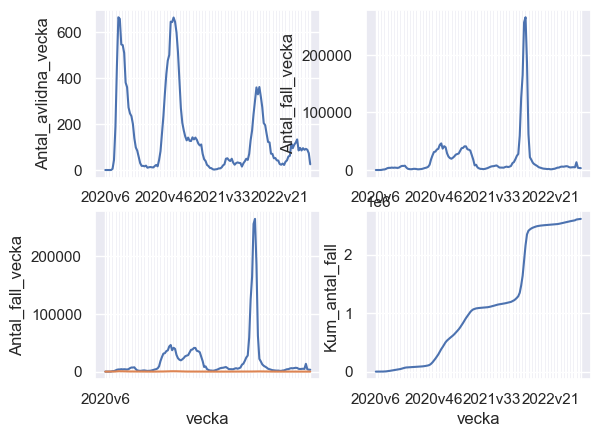

In [297]:
# uppgift 1.c-f



sns.set()
fig, axes = plt.subplots(2,2)


deaths = sns.lineplot(x="vecka", y="Antal_avlidna_vecka", data=covid_week_data, ax=axes[0,0])
cases = sns.lineplot(data=covid_week_data, x="vecka", y="Antal_fall_vecka", ax=axes[0,1])
deaths_and_cases = sns.lineplot(data=covid_week_data, x="vecka", y="Antal_fall_vecka", ax=axes[1,0])
cases_and_deaths = sns.lineplot(data=covid_week_data, x="vecka", y="Antal_avlidna_vecka", ax=axes[1,0])
cumulative_cases = sns.lineplot(data=covid_week_data, x="vecka", y="Kum_antal_fall", ax=axes[1,1])


charts = [deaths, cases, deaths_and_cases, cases_and_deaths, cumulative_cases]
for chart in charts:
    for ind, label in enumerate(chart.get_xticklabels()):
        if ind % 40 == 0:  # var 40e vecka
            label.set_visible(True)
        else:
            label.set_visible(False)

plt.show()



In [300]:
# Uppgift 2.a
vaxx_data = pd.read_excel('Folkhalsomyndigheten_Covid19_Vaccine.xlsx', sheet_name='Vaccinerade kommun och ålder')
vaxx_data.fillna(0, inplace=True)


nr_of_counties = vaxx_data["Län_namn"].nunique()
print(f"Antal län: {nr_of_counties}")


# Uppgift 2.b
nr_of_municipalities = vaxx_data["Kommun_namn"].nunique()
print(f"Antal län: {nr_of_municipalities}")


# Uppgift 2.c
befolkning = vaxx_data["Befolkning"].sum()
print(f"Sverige befolkning: {befolkning:,} st.")



Antal län: 21
Antal län: 290
Sverige befolkning: 9,092,790 st.


In [292]:
# Uppgift 2.d

total_pop = 10_521_556
#Källa: https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/sveriges-befolkning/


lowest_ages = ['12-15', '16-17']
lowest_ages_query = vaxx_data.query("Ålder.isin(@lowest_ages)")


ages_12_to_17 = lowest_ages_query["Befolkning"].sum()
dataset_population = vaxx_data["Befolkning"].sum()


under_12 = total_pop - dataset_population
under_18 = under_12 + ages_12_to_17
pct_of_total_population = under_18 / total_pop


print(f"Befolkning under 18: {under_18:,}")
print(f"Cirka {pct_of_total_population*100:.1f}%")


Befolkning under 18: 2,174,136
Cirka 20.7%


In [302]:
# Uppgift 2.e

age = vaxx_data.groupby("Ålder")

ages = age["Befolkning"].sum()
ages_df = ages.reset_index()

total_population = ages_df["Befolkning"].sum()

fig = px.bar(ages_df, x="Ålder", y="Befolkning", title=f"Åldersfördelning bland Sveriges {total_population:,} invånare")
fig.show()


In [319]:
# Uppgift 2.f
from plotly.subplots import make_subplots

# minst 1 dos per county


county_group = vaxx_data.groupby("Län_namn")

pct_atleast_1 = county_group["Andel minst 1 dos"].mean()*100
pct_atleast_1_df = pct_atleast_1.reset_index()

#fig.show()


# andel 2 doser per län


vaxx_data["Andel 2 doser"] = vaxx_data.apply(lambda x: x['Andel minst 2 doser'] - x["Andel 3 doser"], axis=1)
county = vaxx_data.groupby("Län_namn")


andel_2 = county["Andel 2 doser"].mean()*100
andel_2_df = andel_2.reset_index()


#fig.show()




# andel 3 doser per län


vaxx_data["Andel 3 doser_1"] = vaxx_data.apply(lambda x: x['Andel 3 doser'] - x["Andel 4 doser"], axis=1)
county_group = vaxx_data.groupby("Län_namn")


pct_atleast_3 = county_group["Andel 3 doser_1"].mean()*100
pct_atleast_3_df = pct_atleast_3.reset_index()



fig = make_subplots(rows=3, cols=1)


fig1 = px.bar(pct_atleast_1_df, x="Län_namn", y="Andel minst 1 dos", title="Andel minst 1 dos i procentenheter", row=1, col=1)
fig2 = px.bar(andel_2_df, x="Län_namn", y="Andel 2 doser", title="Andel 2 doser i %", row=2, col=1)
fig3 = px.bar(pct_atleast_3_df, x="Län_namn", y="Andel 3 doser_1", title="Andel 3 doser i %", row=3, col=1)


fig.update_layout(height=600, width=600, title_text="Stacked Subplots")

fig.show()





,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser,Andel 2 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,0.0,0.0,0.497936,0.431874,0.000000,0.000000,0.431874
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,0.0,0.0,0.697423,0.627598,0.000000,0.000000,0.627598
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,0.0,0.730275,0.667812,0.292738,0.000000,0.375075
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,0.0,0.755865,0.714675,0.392526,0.000000,0.322149
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,0.0,0.805068,0.781601,0.535416,0.000000,0.246185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,25,Norrbottens län,2584,Kiruna,50-59,3079,2878,2860,2482.0,0.0,0.934719,0.928873,0.806106,0.000000,0.122767
2896,25,Norrbottens län,2584,Kiruna,60-69,2781,2648,2633,2434.0,0.0,0.952175,0.946782,0.875225,0.000000,0.071557
2897,25,Norrbottens län,2584,Kiruna,70-79,2194,2115,2108,2034.0,1784.0,0.963993,0.960802,0.927074,0.813127,0.033728
2898,25,Norrbottens län,2584,Kiruna,80-89,1280,1256,1253,1220.0,1091.0,0.981250,0.978906,0.953125,0.852344,0.025781


Län_namn
Blekinge län            34.776813
Dalarnas län            33.038457
Gotlands län            35.908361
Gävleborgs län          32.656966
Hallands län            34.140944
Jämtlands län           32.973123
Jönköpings län          34.053137
Kalmar län              34.486242
Kronobergs län          31.080938
Norrbottens län         34.783273
Skåne län               31.230437
Stockholms län          32.606335
Södermanlands län       32.516577
Uppsala län             35.023821
Värmlands län           34.867826
Västerbottens län       34.730555
Västernorrlands län     34.992606
Västmanlands län        32.090898
Västra Götalands län    32.449298
Örebro län              34.459445
Östergötlands län       35.813656
Name: Andel 3 doser_1, dtype: float64

In [290]:
import plotly.graph_objects as go

county_group = vaxx_data[["Län_namn","Andel minst 1 dos", "Andel minst 2 doser", "Andel 3 doser", "Andel 4 doser"]].groupby("Län_namn")

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

#counties = 

counties_query = vaxx_data.query("Län_namn.isin(@counties)")
counties_df = counties_query[["Län_namn", "Andel minst 1 dos", "Andel minst 2 doser", "Andel 3 doser", "Andel 4 doser"]]
counties_group_mean = counties_df.groupby("Län_namn").mean()
county_df = counties_group_mean.reset_index()

county_df = pd.melt(county_df, id_vars="Län_namn", var_name="Doser", value_vars=['Andel minst 1 dos', 'Andel minst 2 doser', 'Andel 3 doser', 'Andel 4 doser'] )


fig = px.bar(county_df, x='Län_namn', y='value', color='Doser', barmode='group')
fig.show()


In [286]:
# KPI:er

# Genomsnittlig Andel vaccinerade i 10 största städerna
# Genomsnittlig minskning av andel vaccinerade med 1 dos till 4
# 





In [227]:
under_ages = ['12-15', '16-17']
young_ages = ['18-29','30-39', '40-49', '50-59']
upper_ages = ['60-69', '70-79', '80-89', '90 eller äldre']

all_ages = under_ages + young_ages + upper_ages

twelve_to_29 = vaxx_data.query("Ålder.isin(@mid_ages)")

twelve_to_29["Andel minst 1 dos"].mean()






0.8624857337880867